In [1]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
import time

base = BaseOverlay("base.bit")
hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out

In [2]:
hdmi_in.configure(PIXEL_RGB)
hdmi_out.configure(hdmi_in.mode,PIXEL_RGB)

hdmi_in.start()
hdmi_out.start()

#hdmi_in.tie(hdmi_out)

In [15]:
hdmi_in.tie(hdmi_out)

In [22]:
import cv2
import numpy as np
import time
numframes = 10


start = time.time()

for _ in range(numframes):
    inframe = hdmi_in.readframe()
    #cv2.cvtColor(inframe,cv2.COLOR_RGB2GRAY,dst=grayscale)
    #inframe.freebuffer()
    outframe = hdmi_out.newframe()
    cv2.Canny(inframe, 50, 100, edges=outframe)
    inframe.freebuffer()
    
    #outframe = hdmi_out.newframe()
    #cv2.cvtColor(result, cv2.COLOR_GRAY2RGB,dst=outframe)
    hdmi_out.writeframe(outframe)
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))
print("Second:  " + str(end - start))

Frames per second:  5.958828812727613
Second:  1.6781821250915527


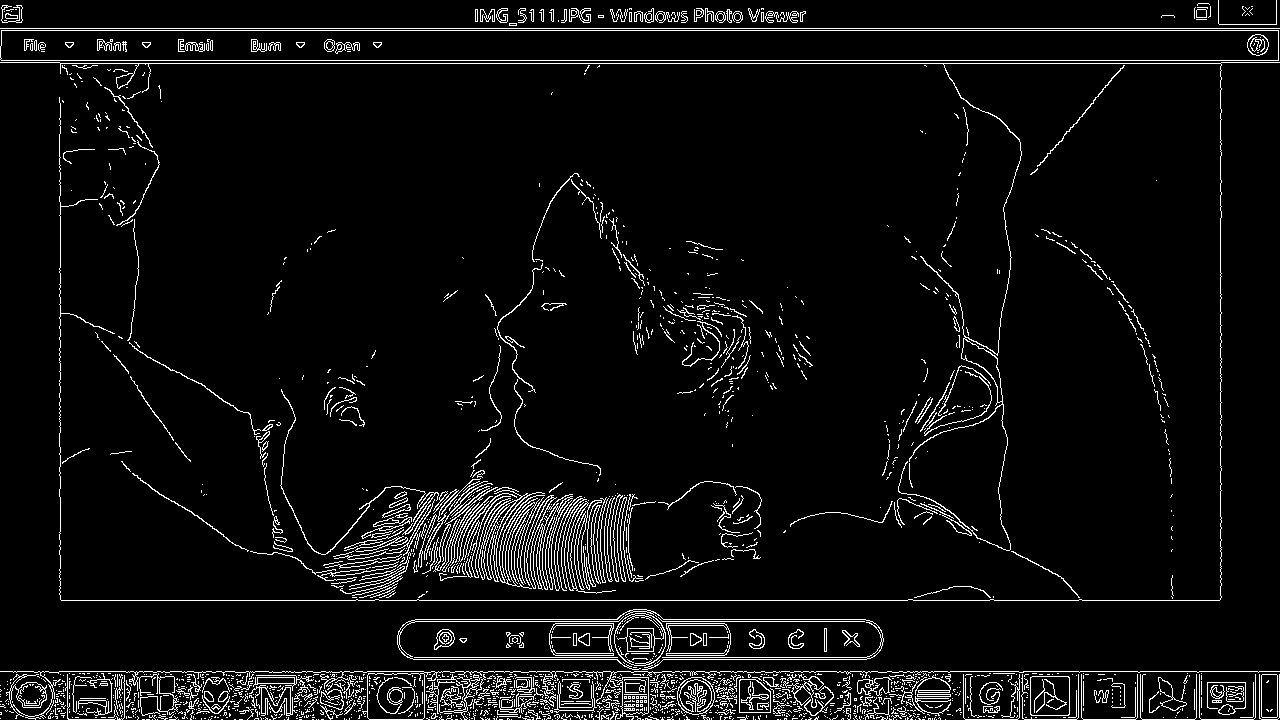

In [19]:
import PIL.Image

frame = hdmi_in.readframe()
image = PIL.Image.fromarray(outframe)
#image.save(cannyDesktop)
image

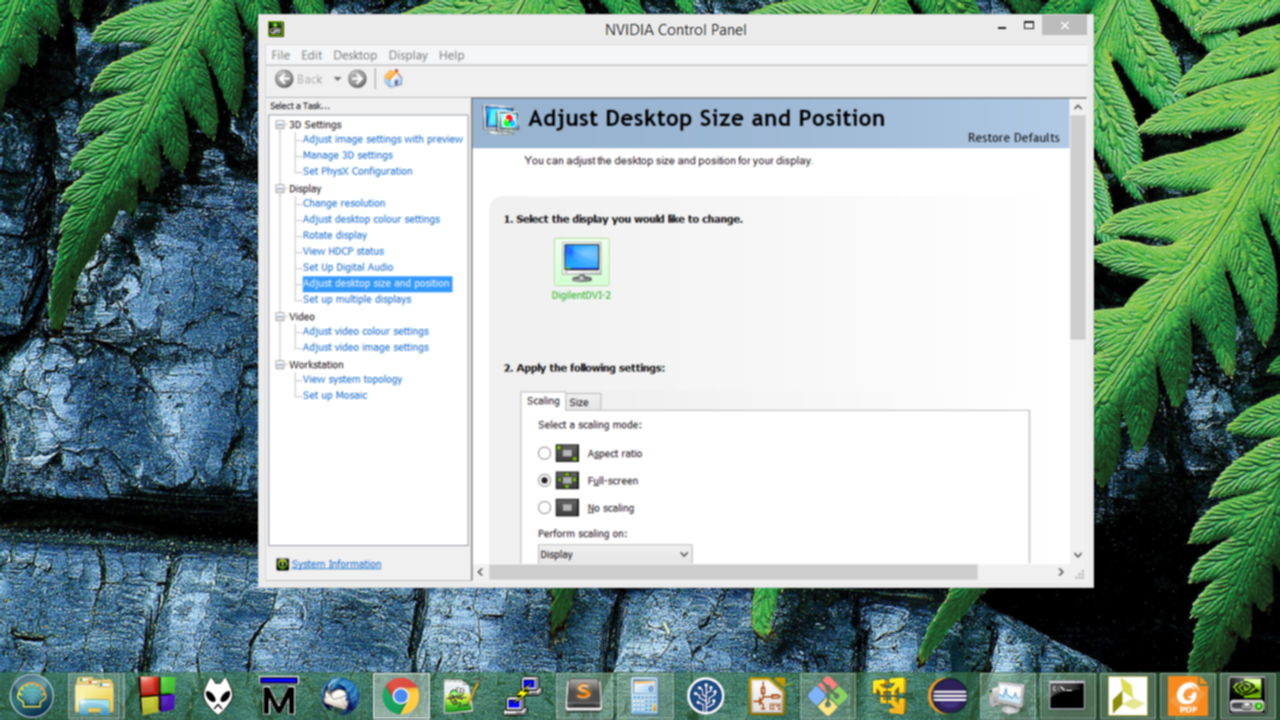

In [35]:
import PIL.Image
import cv2

frame.freebuffer
frame = hdmi_in.readframe()
image = PIL.Image.fromarray(frame)
#image.save(cannyDesktop)
image
im2 = cv2.GaussianBlur(frame,(3,3),1)
image2 = PIL.Image.fromarray(im2)
image2

In [68]:
import PIL.Image
import cv2

#frame.freebuffer
#frame = hdmi_in.readframe()
#image = PIL.Image.fromarray(frame)
#image.save(cannyDesktop)
d=100
flatte = frame.flat
#print(frame[0][2][0])
#len(frame)
print(len(flatte))
frame.size

2764800


2764800

In [70]:
import math

#get some input
#frame.freebuffer
#frame = hdmi_in.readframe()
#image = PIL.Image.fromarray(frame)

#vars voor kernel
#del kernel[:] #make kernel empty
kernel = []
output = []
sigma = 0.1
n = 2 * (int)(2 * sigma) + 3
#print(n)
mean = math.floor(n / 2.0)

#convolution vars
khalf = (int) (n / 2)
print(khalf)
WIDTH = 1280
HEIGTH = 720

#convu_target = frame.flat

c=0
for i in range(0, n):
    for j in range(0, n):
        #insert heeft de optie om een plaats mee te geven itt append
        kernel.insert(c, math.exp(-0.5 * (math.pow((i - mean) / sigma, 2.0) + math.pow((j - mean) / sigma, 2.0)))/ (2 * math.pi * sigma * sigma))
        c+=1
#len(kernel)

#alsnog een c forloop def :S
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

for m in my_range (khalf, (WIDTH - khalf)-1, 1):
    for n in my_range(khalf, (HEIGTH - khalf)-1, 1):
        pixel = 0.0
        d = 0
        for l in my_range (-khalf, khalf,1):
            for k in my_range(-khalf,khalf,1):
                f_index = (int) ((n - l) * WIDTH + m - k)
                #print(flatte[d])
                pixel += flatte[f_index] * kernel[d]
                #print(d)
                d+=1
        o_index = (int) (n * WIDTH + m)
        #print(o_index)
        output.insert(o_index,pixel)
        
blur_image = PIL.Image.fromarray(output)
blur_image

1


KeyboardInterrupt: 

In [6]:
import time

numframes = 1
start = time.time()

for _ in range(numframes):
    f = hdmi_in.readframe()
        #help(hdmi_in.readframe)
    hdmi_out.writeframe(f)
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

AttributeError: 'numpy.ndarray' object has no attribute 'freebuffer'

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

outframe = hdmi_in.readframe()

result = np.ndarray(shape=(hdmi_in.mode.height, hdmi_in.mode.width),
                    dtype=np.uint8)

img = cv2.imread('messi5.jpg',0)
cv2.Canny(img,100,200,edges=result)

outframe = edges

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

hdmi_out.writeframe(outframe)

In [71]:
hdmi_out.close()
hdmi_in.close()